# Importing our Datasets: 
We need to use pandas to get the csv files from their respective URLs

In [4]:
# Make necessary imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Create datasets from URLs
cab_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
cab_data = pd.read_csv(cab_data_url)

city_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
cities = pd.read_csv(city_data_url)

customer_id_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
customers = pd.read_csv(customer_id_url)

transaction_id_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'
transactions = pd.read_csv(transaction_id_url)

# The Client 
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.



# Understanding the Data
Look at the heads and info of the data to get an understanding of how they are formed

In [5]:
print('Cab Data')
cab_data.info()
cab_data.head()
print('----------------------------------------------------------------')
print('Cities')
cities.info()
cities.head()
print('----------------------------------------------------------------')
print('Customers')
customers.info()
customers.head()
print('----------------------------------------------------------------')
print('Transactions')
transactions.info()
transactions.head()

Cab Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
----------------------------------------------------------------
Cities
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Understanding the Problem 
We need to find out more information about our data to further understand our market: 

Some of our attributes have spaces in them. Let's take these spaces out so the columns can be accessed more easily. 

In [6]:
cab_data.columns = [c.replace(' ', '_') for c in cab_data.columns]
cities.columns = [c.replace(' ', '_') for c in cities.columns]
customers.columns = [c.replace(' ', '_') for c in customers.columns]
transactions.columns = [c.replace(' ', '_') for c in transactions.columns]

In [7]:
cab_data.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

We now can see that there are only 2 companies to be analyzed: Pink Cab and Yellow Cab.

In [8]:
print(cab_data.City.unique())
len(cab_data.City.unique())

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


19

We can see that there are 19 unique cities in which the cab transactions take place spread across the country 

In [9]:
print(len(cab_data.Date_of_Travel.unique()))

1095


As we can see above, there are 1095 unique dates within the dataset. The original problem states that the time period is between 01/31/2016 to 12/31/2016. However, since only 1066 calendar days are between these two dates, I believe this is a typo and that the actual time period is 01/01/2016 to 12/31/2018 in which there are 1096 unique calendar days. 

In [10]:
print(min(cab_data.Date_of_Travel.unique()))
print(max(cab_data.Date_of_Travel.unique()))

42371
43465


Therefore, the above two dates correspond to 01/01/2016 and 12/31/2018 respectively. 

In [11]:
print(transactions.Payment_Mode.unique())
print(len((transactions.Payment_Mode.unique())))

['Card' 'Cash']
2


As seen above, there are only 2 forms of payment: Card and Cash.

# Feature Engineering
Let's start to manipulate some of our features so that they will be more useful to us.

First, it may be useful to create a new feature 'Profit', which tells us the profit that the cab company made on each transaction. This will be calculated by subtracting Cost_Of_Trip from Price_Charged.

In [12]:
cab_data["Profit"] = cab_data['Price_Charged'] - cab_data['Cost_of_Trip']
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


As seen above, we now have a new column profit which calculates the information we were looking for. 

Second, it may be useful to know how much the customer was charged per KM of distance travelled. Let's add a feature labeled 'Price_per_KM', which calculates this information by dividing 'Price_Charged' by 'KM_Travelled'. 

In [13]:
cab_data["Price_per_KM"] = cab_data['Price_Charged'] / cab_data['KM_Travelled']
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Price_per_KM
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,12.182266
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,12.526904
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,13.849558
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,11.377751
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,13.129439


As seen above, we now have another new feature that provides us with the Price per KM information. 

Third, it might be useful to know the percentage of each city that uses cabs from the two companies. To gain this information, let's create one feature: 'City_Per' which tells us the percent of each city that uses the either of the two cab companies. Note: I am assuming that the feature 'Users' is referring to the number of users of the two companies combined. 

In [14]:
# First, we must remove the commas from the 'Users' and 'Population' columns in Cities
cities['Users'] = cities['Users'].str.replace(',', '')
cities['Population'] = cities['Population'].str.replace(',', '')
cities.head()

# Then, we must convert 'Users' and 'Population' in Cities to integers instead of strings
cities['Users'] = cities['Users'].astype(float)
cities['Population'] = cities['Population'].astype(float)

cities["City_Per"] = cities['Users'] / cities['Population']
cities.head()

,City,Population,Users,City_Per
0,NEW YORK NY,8405837.0,302149.0,0.035945
1,CHICAGO IL,1955130.0,164468.0,0.084121
2,LOS ANGELES CA,1595037.0,144132.0,0.090363
3,MIAMI FL,1339155.0,17675.0,0.013199
4,SILICON VALLEY,1177609.0,27247.0,0.023138


We now have a new feature 'City_Per' that tells us the decimal percentage for the amount of users in each city.

Fourth, since Gender is binary in this dataset, we can convert these values to 0s and 1s. In this case, we will say that Male represents 1 and Female represents 0.

In [15]:
customers['Gender'] = customers['Gender'].replace(['Male', 'Female'],['1', '0'])
customers['Gender'] = customers['Gender'].astype(int)

In [16]:
customers.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,1,28,10813
1,27703,1,27,9237
2,28712,1,53,11242
3,28020,1,23,23327
4,27182,1,33,8536


We now have 'Gender' as a binary column. 

Fifth, it might be useful to know the percentage of a customers income that they are spending on any given transaction. This will give us an idea of what the money spent means to each individual. Let's call this column 'Percent_of_Income'. In order to create this, we will have to make use of the relationship between 'Customers' and 'Transactions' through the 'Customer_ID', along with the relationship between 'Cab-Data' and 'Transactions' through the 'Transaction-ID'. 

In [17]:
# First, merge with cab_data through the 'Transaction_ID' relationship. We then need to trim the unwanted columns
transactions = transactions.merge(cab_data, left_on = 'Transaction_ID', right_on = 'Transaction_ID', how = 'left')
transactions = transactions[['Transaction_ID', 'Customer_ID', 'Payment_Mode', 'Price_Charged']]

# Second, merge with customers through the 'Customer_ID' relationship. We then need to trim the unwanted columns
transactions = transactions.merge(customers, left_on = 'Customer_ID', right_on = 'Customer_ID', how = 'left')
transactions = transactions[['Transaction_ID', 'Customer_ID', 'Payment_Mode', 'Price_Charged', 'Income_(USD/Month)']]

# Now, we will create the 'Percent_of_Income' column that we desire
transactions['Percent_of_Income'] = transactions['Price_Charged'] / transactions['Income_(USD/Month)']

# Let's now drop the 'Price-Charged' and 'Income' columns since we already have those in other datasets
transactions = transactions[['Transaction_ID', 'Customer_ID', 'Payment_Mode', 'Percent_of_Income']]
transactions

,Transaction_ID,Customer_ID,Payment_Mode,Percent_of_Income
0,10000011,29290,Card,0.034306
1,10000012,27703,Card,0.038813
2,10000013,28712,Cash,0.011137
3,10000014,28020,Cash,0.016179
4,10000015,27182,Card,0.013428
...,...,...,...,...
440093,10440104,53286,Cash,0.017425
440094,10440105,52265,Cash,0.054867
440095,10440106,52175,Card,0.022760
440096,10440107,52917,Card,0.016978


We now have the added column that we were looking for. 

# Assembling our Master Dataset: 
Now that we have engineered the features to our liking, it is time to assemble our master dataset, which will combine all useful information into a singular dataframe. The PK for this dataset will be 'Transaction_ID' and it will contain 17 features, 5 of which were engineered in the previous section. 

In [18]:
# First, left join on 'Cities' and 'Cab-Data'
master_one = cab_data.merge(cities, left_on = 'City', right_on = 'City', how = 'left')

# Second, left join on 'Transactions' and 'Customers'
master_two = transactions.merge(customers, left_on = 'Customer_ID', right_on = 'Customer_ID', how = 'left')

# Third, left join these two datasets on 'Transaction_ID' to get final master set 
master = master_one.merge(master_two, left_on = 'Transaction_ID', right_on = 'Transaction_ID', how = 'left')

master

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Price_per_KM,Population,Users,City_Per,Customer_ID,Payment_Mode,Percent_of_Income,Gender,Age,Income_(USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,12.182266,814885.0,24701.0,0.030312,29290,Card,0.034306,1,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,12.526904,814885.0,24701.0,0.030312,27703,Card,0.038813,1,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,13.849558,814885.0,24701.0,0.030312,28712,Cash,0.011137,1,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,11.377751,814885.0,24701.0,0.030312,28020,Cash,0.016179,1,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,13.129439,814885.0,24701.0,0.030312,27182,Card,0.013428,1,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,14.425000,418859.0,127001.0,0.303207,52392,Cash,0.004424,1,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,13.541667,418859.0,127001.0,0.303207,53286,Cash,0.017425,1,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,15.750270,418859.0,127001.0,0.303207,52265,Cash,0.054867,1,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,16.612500,418859.0,127001.0,0.303207,52175,Card,0.022760,1,32,6423


We now have our master dataset as seen above. Before we move on, let's organize the columns in a more intuitive way. Also, we will rename some of the columns to try and make them shorter and more descriptive. 

In [19]:
# Reorganizing columns 
master = master[['Transaction_ID', 'Company', 'Date_of_Travel', 'Customer_ID', 'Gender', 'Age', 'KM_Travelled', 'Profit', 'Price_Charged', 'Cost_of_Trip', 'Price_per_KM', 'Payment_Mode', 'Income_(USD/Month)', 'Percent_of_Income', 'City', 'City_Per', 'Users', 'Population']]

# Rename columns 
master.rename(columns = {'Date_of_Travel':'Date', 'KM_Travelled':'Distance(KM)', 'Price_Charged':'Revenue', 'Cost_of_Trip':'Cost', 'Income_(USD/Month)': 'Monthly_Income', 'Percent_of_Income': 'Income_Percentage',  'City_Per':'City_Percentage', 'Users':'City_Users', 'Population': 'City_Population'}, inplace = True)
master

,Transaction_ID,Company,Date,Customer_ID,Gender,Age,Distance(KM),Profit,Revenue,Cost,Price_per_KM,Payment_Mode,Monthly_Income,Income_Percentage,City,City_Percentage,City_Users,City_Population
0,10000011,Pink Cab,42377,29290,1,28,30.45,57.3150,370.95,313.6350,12.182266,Card,10813,0.034306,ATLANTA GA,0.030312,24701.0,814885.0
1,10000012,Pink Cab,42375,27703,1,27,28.62,23.6660,358.52,334.8540,12.526904,Card,9237,0.038813,ATLANTA GA,0.030312,24701.0,814885.0
2,10000013,Pink Cab,42371,28712,1,53,9.04,27.5680,125.20,97.6320,13.849558,Cash,11242,0.011137,ATLANTA GA,0.030312,24701.0,814885.0
3,10000014,Pink Cab,42376,28020,1,23,33.17,25.7980,377.40,351.6020,11.377751,Cash,23327,0.016179,ATLANTA GA,0.030312,24701.0,814885.0
4,10000015,Pink Cab,42372,27182,1,33,8.73,16.8440,114.62,97.7760,13.129439,Card,8536,0.013428,ATLANTA GA,0.030312,24701.0,814885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,43108,52392,1,24,4.80,5.8800,69.24,63.3600,14.425000,Cash,15651,0.004424,WASHINGTON DC,0.303207,127001.0,418859.0
359388,10440104,Yellow Cab,43104,53286,1,32,8.40,6.9020,113.75,106.8480,13.541667,Cash,6528,0.017425,WASHINGTON DC,0.303207,127001.0,418859.0
359389,10440105,Yellow Cab,43105,52265,1,56,27.75,87.4200,437.07,349.6500,15.750270,Cash,7966,0.054867,WASHINGTON DC,0.303207,127001.0,418859.0
359390,10440106,Yellow Cab,43105,52175,1,32,8.80,32.1420,146.19,114.0480,16.612500,Card,6423,0.022760,WASHINGTON DC,0.303207,127001.0,418859.0


# Cleaning our Data
Now that our data is in the form that we desire. It is important that we clean it before we use it for advanced analysis. 

In [20]:
# Lets take a look at how many null values each column has. 
master.isnull().any()

Transaction_ID       False
Company              False
Date                 False
Customer_ID          False
Gender               False
Age                  False
Distance(KM)         False
Profit               False
Revenue              False
Cost                 False
Price_per_KM         False
Payment_Mode         False
Monthly_Income       False
Income_Percentage    False
City                 False
City_Percentage      False
City_Users           False
City_Population      False
dtype: bool

From the surface, no values are missing in our dataset. However, there still may be things like duplicates and outliers that need to be removed. 

In [21]:
# Lets look at the descriptive stats and info in order to analyze potential outliers. 
master.info()
master.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction_ID     359392 non-null  int64  
 1   Company            359392 non-null  object 
 2   Date               359392 non-null  int64  
 3   Customer_ID        359392 non-null  int64  
 4   Gender             359392 non-null  int64  
 5   Age                359392 non-null  int64  
 6   Distance(KM)       359392 non-null  float64
 7   Profit             359392 non-null  float64
 8   Revenue            359392 non-null  float64
 9   Cost               359392 non-null  float64
 10  Price_per_KM       359392 non-null  float64
 11  Payment_Mode       359392 non-null  object 
 12  Monthly_Income     359392 non-null  int64  
 13  Income_Percentage  359392 non-null  float64
 14  City               359392 non-null  object 
 15  City_Percentage    359392 non-null  float64
 16  Ci

,Transaction_ID,Date,Customer_ID,Gender,Age,Distance(KM),Profit,Revenue,Cost,Price_per_KM,Monthly_Income,Income_Percentage,City_Percentage,City_Users,City_Population
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05
mean,1.022076e+07,42964.067998,19191.652115,0.572945,35.336705,22.567254,137.253198,423.443311,286.190113,18.765127,15048.822937,0.043365,0.106687,158365.582267,3.132198e+06
std,1.268058e+05,307.467197,21012.412463,0.494651,12.594234,12.233526,160.311840,274.378911,157.993661,5.878560,7969.409482,0.052294,0.106331,100850.051020,3.315194e+06
min,1.000001e+07,42371.000000,1.000000,0.000000,18.000000,1.900000,-220.060000,15.600000,19.000000,6.338621,2000.000000,0.000476,0.006497,3643.000000,2.489680e+05
25%,1.011081e+07,42697.000000,2705.000000,0.000000,25.000000,12.000000,28.012000,206.437500,151.200000,14.451327,8424.000000,0.013753,0.035945,80021.000000,6.712380e+05
50%,1.022104e+07,42988.000000,7459.000000,1.000000,33.000000,22.440000,81.962000,386.360000,282.480000,17.153501,14685.000000,0.026913,0.072964,144132.000000,1.595037e+06
75%,1.033094e+07,43232.000000,36078.000000,1.000000,42.000000,32.960000,190.030000,583.660000,413.683200,22.234926,21035.000000,0.051020,0.090363,302149.000000,8.405837e+06
max,1.044011e+07,43465.000000,60000.000000,1.000000,65.000000,48.000000,1463.966000,2048.030000,691.200000,53.955556,35000.000000,0.857338,0.321411,302149.000000,8.405837e+06


Based on the stats, features that raise red flags in terms of potential outliers include: Profit, Revenue, Price per KM, and Income Percentage. Let's start by excluding values that have an absolute z-score of greater than 3. 

In [22]:
# We need to save the rows that contain outliers. 
# Note: We cannot remove them until we save rows for all 4 columns since doing this will 
# change the means and therefore z-scores. 
profit_rows = master[(np.abs(stats.zscore(master['Profit'])) > 3)]
revenue_rows = master[(np.abs(stats.zscore(master['Revenue'])) > 3)]
price_per_rows = master[(np.abs(stats.zscore(master['Price_per_KM'])) > 3)]
income_per_rows = master[(np.abs(stats.zscore(master['Income_Percentage'])) > 3)]

We now have found the rows that contain values with z-scores greater than 3 for the 4 columns we are cleaning. Note: It is important we calculate all of these before removing any rows because doing so will change the averages and SD's. Next, let's create a list of all indexes that contain outliers so we can easily remove them from the master dataset. 

In [23]:
# get indexes for each column with outliers
profit_indexes = list(profit_rows.index.values)
revenue_indexes = list(revenue_rows.index.values)
price_per_indexes = list(price_per_rows.index.values)
income_per_indexes = list(income_per_rows.index.values)
# combine into one set of unique values
outlier_rows = set(profit_indexes + revenue_indexes + price_per_indexes + income_per_indexes)

In [24]:
# convert set to list and drop from master 
master.drop(list(outlier_rows), axis = 0, inplace = True)

Next, let's look for potential duplicate rows. Just because the Transaction ID is unique, doesn't mean a duplicate wasn't added with a different ID. In this case, it's fair to say that if two rows have the same Customer ID, Date, Distance, Cost, and Revenue, then they are duplicates where one should be removed. 

In [25]:
duplicates = master.duplicated(subset = ['Customer_ID', 'Date','Distance(KM)', 'Cost', 'Revenue'])

In [26]:
trues = sum(duplicates)
print(trues)

0


In [27]:
check_again = master.duplicated(subset = ['Customer_ID', 'Date','Distance(KM)'])

In [28]:
trues = sum(check_again)
print(trues)

5


At first, the above number was a bit concerning, however, it is very plausible that over the course of two years, the same customer took two different trips on the same day with the same distance. For example, a customer could be taking a taxi to work and again from work later that day. In this case the distance would hypothetically be the same so we can leave these 5 entries. 

Our data is now clean and ready to be analyzed. 

# Hypotheses on the Data
Now it is time to generate several hypotheses on the data to further investigate it. 

Hypothesis #1: There is a positive, strong relationship between monthly customers and profit per trip. * WANT TO CHANGE? 

Hypothesis #2: The company that makes more profit will have more "repeat trips" (Will define "repeat trips" as a client who books a trip with the same company within a week of their last trip)

Hypothesis #3: Higher income clients will likely book more trips that are more expensive per KM than lower income clients. 

Hypothesis #4: Shorter trips will generate more profit per KM than longer trips. 

Hypothesis #5: Cities with higher populations will generate trips with more profit. (Cities with more people = increased demand = higher profit)

# Hypothesis 1: 

In order to analyze this hypothesis, we first should look at each company and their number of monthly customers. 

In [29]:
# Let's create a dataset that contains each company and their respective number of clients each month. 
# For simplicity, we will define a month as 30 days 
# Since the time period we are looking at is 3 years there will be 36 months 
p_monthly_nums = []
y_monthly_nums = []
curr_date = 42371
for i in range(1,37): 
    p_customers = 0
    y_customers = 0
    for i in range(1,31): 
        p_customers += len(master.loc[(master['Date'] == curr_date) & (master['Company'] == 'Pink Cab')])
        y_customers += len(master.loc[(master['Date'] == curr_date) & (master['Company'] == 'Yellow Cab')])
        curr_date += 1
    p_monthly_nums.append(p_customers)
    y_monthly_nums.append(y_customers)

Text(0.5, 1.0, 'Cab Companies Monthly Customers')

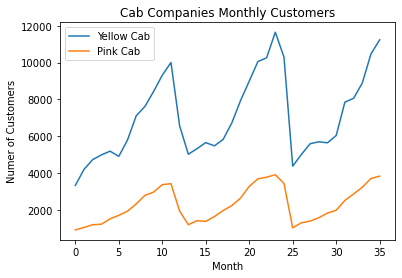

In [30]:
# Now lets plot the results
plt.plot(y_monthly_nums, label = 'Yellow Cab')
plt.plot(p_monthly_nums, label = 'Pink Cab')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.title('Cab Companies Monthly Customers')

Clearly, we can see that the Yellow Cab Company generates more clients per month. However, it is also important to look at how much profit each company is making per client. 

In [31]:
y_avg_profit = np.average(master.loc[master['Company'] == 'Yellow Cab', 'Profit'])
p_avg_profit = np.average(master.loc[master['Company'] == 'Pink Cab', 'Profit'])

In [32]:
y_avg_profit, p_avg_profit

(139.28094769202323, 61.39540224481051)

We can now see that our hypothesis is confirmed. Yellow Cab, the company that brings in more clients per month also makes significantly more money per trip. 

# Hypothesis #2

In order to analyze this hypothesis, we will need to find the number of repeat customers for each customer

In [33]:
y_data = master.loc[master['Company'] == 'Yellow Cab']
p_data = master.loc[master['Company'] == 'Pink Cab']

In [51]:
y_repeats = 0
for cust in y_data.Customer_ID.unique(): 
    prev = 0
    curr = 0
    diff = 8
    y_cust_data = y_data.loc[y_data['Customer_ID'] == cust]
    for date in y_cust_data['Date']: 
        curr = date
        diff = curr - prev
        prev = curr
        if diff < 8: 
            y_repeats += 1
y_repeats 

27554

In [52]:
p_repeats = 0
for cust in p_data.Customer_ID.unique(): 
    prev = 0
    curr = 0
    diff = 8
    p_cust_data = p_data.loc[p_data['Customer_ID'] == cust]
    for date in p_cust_data['Date']: 
        curr = date
        diff = curr - prev
        prev = curr
        if diff < 8: 
            p_repeats += 1
p_repeats 

2684

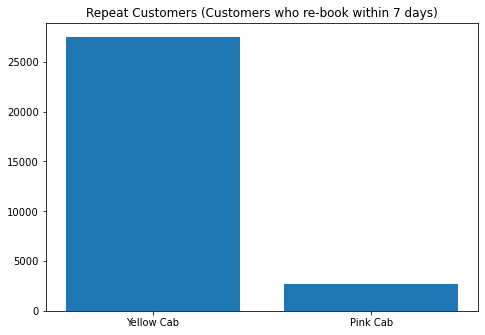

In [56]:

repeat_fig = plt.figure()
ax = repeat_fig.add_axes([0,0,1,1])
companies = ['Yellow Cab', 'Pink Cab']
repeats = [y_repeats, p_repeats]
ax.bar(companies, repeats)
plt.title('Repeat Customers (Customers who re-book within 7 days)')
plt.show()

As seen above, Yellow Cab has many more repeat customers. This supports our hypothesis that the company with more repeat customers will make more profit. 

# Hypothesis #3: 

For this hypothesis, it will be useful to look at the correlation between income of client vs price per KM of the trip. Again, let's separate by Company and create tables to look at this relationship. 

Yellow Cab Correlation: 
(0.029401916686824923, 9.470947066532831e-51)
Pink Cab Correlation: 
(0.015084815236311128, 1.2277842617467292e-05)


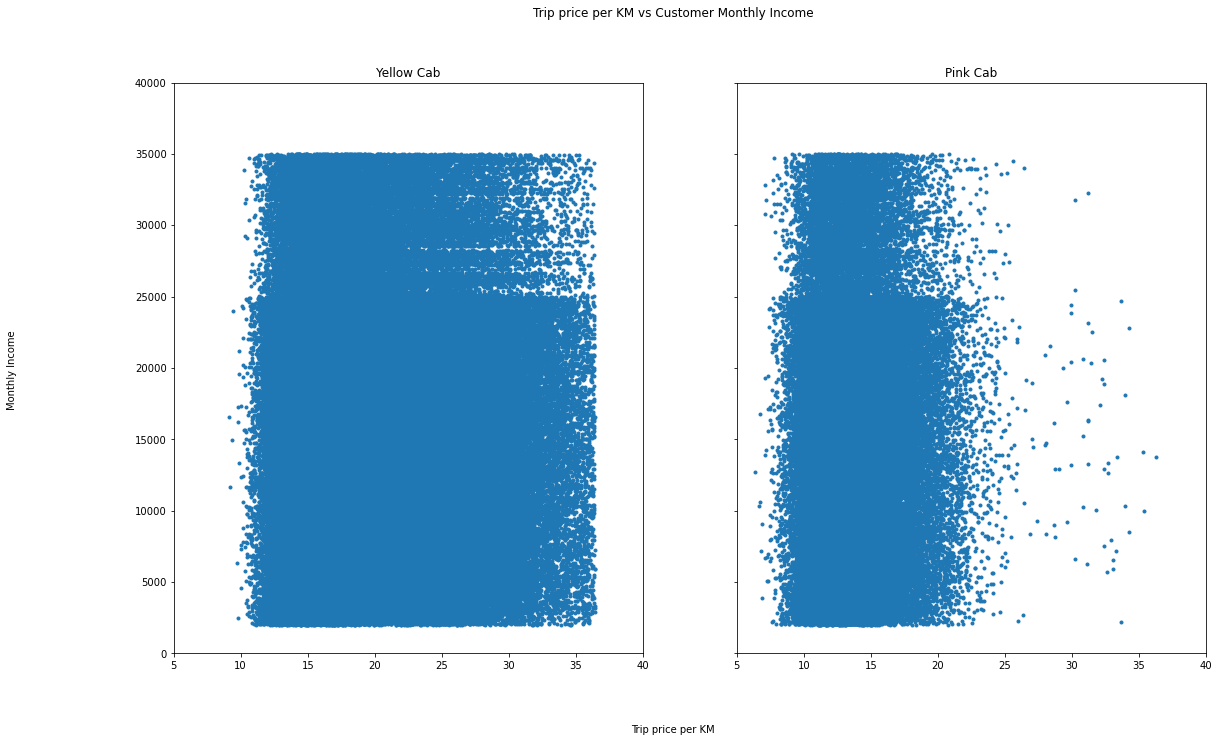

In [114]:
# Set up side by side plots 
hyp3_fig, (y_plot, p_plot) = plt.subplots(1, 2, sharex = True, sharey = True)
hyp3_fig.suptitle('Trip price per KM vs Customer Monthly Income')
hyp3_fig.text(0.5, 0.02, 'Trip price per KM', ha='center')
hyp3_fig.text(0, 0.5, 'Monthly Income', va='center', rotation='vertical')
hyp3_fig.set_size_inches(18.5, 10.5)


# Set up Yellow Cab Plot  
y_hyp3_data = y_data[['Monthly_Income', 'Price_per_KM']]
y_x = y_hyp3_data['Price_per_KM']
y_y = y_hyp3_data['Monthly_Income']
y_plot.plot(y_x, y_y, '.')
y_plot.set_title('Yellow Cab')
y_plot.axis([5, 40, 0, 40000])

# Set up Pink Cab Plot 
p_hyp3_data = p_data[['Monthly_Income', 'Price_per_KM']]
p_x = p_hyp3_data['Price_per_KM']
p_y = p_hyp3_data['Monthly_Income']
p_plot.plot(p_x, p_y, '.')
p_plot.set_title('Pink Cab')
p_plot.axis([5, 40, 0, 40000])

# Print correlations 
print('Yellow Cab Correlation: ')
print(stats.pearsonr(y_x, y_y))
print('Pink Cab Correlation: ')
print(stats.pearsonr(p_x, p_y))

As seen above and through the correlations, there is no visible relationship between Trip Price per KM and Customer monthly income, so our hypothesis is proved wrong. These graphs still will provide valuable information to us when deciding which company to invest in. 

# Hypothesis 4: 

For this hypothesis, we will need to take a look at the amount of profit per KM along with the distance of the trips. 

<ipython-input-115-fe807398a946>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hyp4_data['Profit_per_KM'] = y_hyp4_data['Profit'] / y_hyp4_data['Distance(KM)']
<ipython-input-115-fe807398a946>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_hyp4_data['Profit_per_KM'] = p_hyp4_data['Profit'] / p_hyp4_data['Distance(KM)']


Yellow Cab Correlation: 
(-0.08038916049425572, 0.0)
Pink Cab Correlation: 
(-0.005509839706952049, 0.1102559667918837)


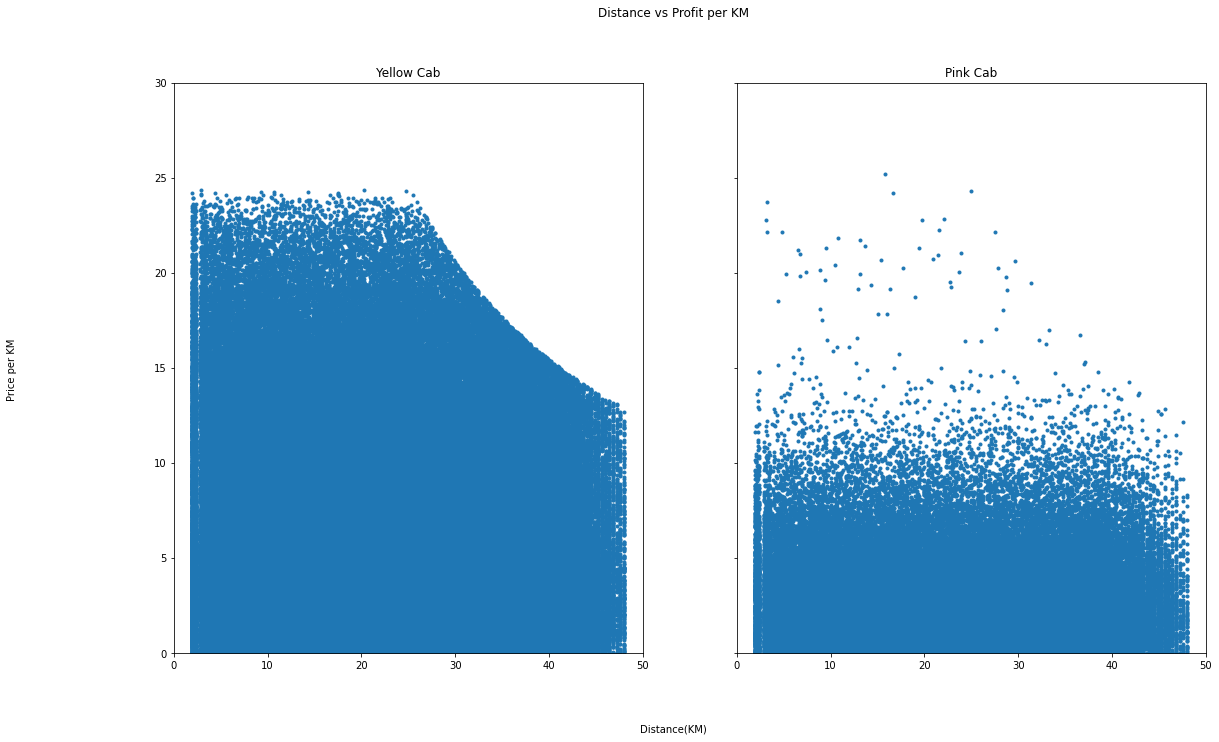

In [115]:
# Create dataframes that we will be using 
# Yellow Cab
y_hyp4_data = y_data[['Profit', 'Distance(KM)']]
y_hyp4_data['Profit_per_KM'] = y_hyp4_data['Profit'] / y_hyp4_data['Distance(KM)']
y_hyp4_data = y_hyp4_data[['Distance(KM)', 'Profit_per_KM']]
# Pink Cab 
p_hyp4_data = p_data[['Profit', 'Distance(KM)']]
p_hyp4_data['Profit_per_KM'] = p_hyp4_data['Profit'] / p_hyp4_data['Distance(KM)']
p_hyp4_data = p_hyp4_data[['Distance(KM)', 'Profit_per_KM']]

# Create side by side plots to show relationship between the two columns 
hyp4_fig, (y_plot, p_plot) = plt.subplots(1, 2, sharex = True, sharey = True)
hyp4_fig.suptitle('Distance vs Profit per KM')
hyp4_fig.text(0.5, 0.02, 'Distance(KM)', ha='center')
hyp4_fig.text(0, 0.5, 'Price per KM', va='center', rotation='vertical')
hyp4_fig.set_size_inches(18.5, 10.5)

# Enter in data for Yellow Cab plot 
y_x = y_hyp4_data['Distance(KM)']
y_y = y_hyp4_data['Profit_per_KM']
y_plot.plot(y_x, y_y, '.')
y_plot.set_title('Yellow Cab')
y_plot.axis([0, 50, 0, 30])

# Enter in data for Pink Cab plot 
p_x = p_hyp4_data['Distance(KM)']
p_y = p_hyp4_data['Profit_per_KM']
p_plot.plot(p_x, p_y, '.')
p_plot.set_title('Pink Cab')
p_plot.axis([0, 50, 0, 30])

# Print correlations 
print('Yellow Cab Correlation: ')
print(stats.pearsonr(y_x, y_y))
print('Pink Cab Correlation: ')
print(stats.pearsonr(p_x, p_y))

The above graphs appear to show a very weak negative correlation between Distance and Price per KM. These graphs will help us in our decision because we can easily see which comapany has more higher profit trips. 

# Hypothesis #5: 

For this hypothesis, we will need to separate the data into cities. We then need to look at the profit per trip for each company. 

In [161]:
# Let's look at the cities for each company. 
y_cities = y_data.City.unique()
p_cities = p_data.City.unique()

y_cities , p_cities

(array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NEW YORK NY',
        'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA',
        'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ',
        'WASHINGTON DC', 'NASHVILLE TN'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object))

We can see that both companies operate in the same 19 cities. 

In [169]:
# hashset to keep track of city populations 
cities_pops = {}
for city in p_cities: 
    pop = list(p_data.loc[p_data['City'] == city, 'City_Population'])
    city_pop = pop[0]
    cities_pops[city] = city_pop

In [170]:
# hashset to keep track of average profit per city 
p_cities_profs = {}
for city in p_cities: 
    prof = np.average(list(p_data.loc[p_data['City'] == city, 'Profit']))
    p_cities_profs[city] = prof

y_cities_profs = {}
for city in p_cities: 
    prof = np.average(list(y_data.loc[y_data['City'] == city, 'Profit']))
    y_cities_profs[city] = prof

In [171]:
labels = list(cities_pops.keys())
pops = list(cities_pops.values())
y_profs = []
p_profs = []
for city in labels: 
    y_profs.append(y_cities_profs[city])
    p_profs.append(p_cities_profs[city])


(0.7128455350040384, 0.0006136112595179221)


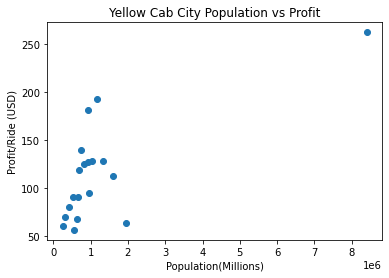

In [186]:
plt.scatter(pops, y_profs)
plt.xlabel('Population(Millions)')
plt.ylabel('Profit/Ride (USD)')
plt.title('Yellow Cab City Population vs Profit')
print(stats.pearsonr(pops, y_profs))

(0.5800051057539565, 0.009236722185031078)


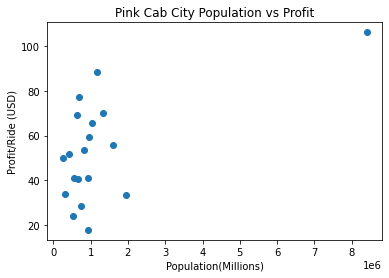

In [187]:
plt.scatter(pops, p_profs)
plt.xlabel('Population(Millions)')
plt.ylabel('Profit/Ride (USD)')
plt.title('Pink Cab City Population vs Profit')
print(stats.pearsonr(pops, p_profs))

As we can see above, there appears to be a relatively strong positive correlation between a City's population and the profit per ride for both companies. Knowing this, we should try and create a metric that quantifies each the total users for each company weighted by the populations of the cities that the customers are in. We'll call this 'Big City Score' 

In [206]:
# Get users in each city for each company 
y_city_users = {}
for city in y_cities: 
    trips = y_data.loc[y_data['City'] == city]
    trips
    users = len(trips.Customer_ID.unique())
    y_city_users[city] = users
    
p_city_users = {}
for city in p_cities: 
    trips = p_data.loc[p_data['City'] == city]
    users = len(trips.Customer_ID.unique())
    p_city_users[city] = users
# Save total number of users for each company 
p_users = np.sum(list(p_city_users.values()))
y_users = np.sum(list(y_city_users.values()))


In [207]:
p_users, y_users

(32186, 39477)

Above we can now see the number of unique users that each company has in total. 

We will calculate 'Big City Score' in the following way: Take the number of users each company has in each city, divide it by that company's total users, and multiply it by the city's population. Do this for every city and sum the results to get the 'Big City Score' metric that we are looking for. 

In [210]:
y_BCS = 0
p_BCS = 0
for city in p_cities: 
    y = y_city_users[city] # users for yellow cab 
    p = p_city_users[city] # users for pink cab 
    y_per = y / y_users # yellow cab user pecent 
    p_per = p / p_users # pink cab user percent 
    y_score = y_per * cities_pops[city] # score for city 
    p_score = p_per * cities_pops[city] # score for city
    y_BCS += y_score 
    p_BCS += p_score 
    
y_score, p_score 

(31830.61022874079, 27302.745976511524)

By our calculation, we can see that Yellow Cab has a Big City Score of ~32,000 and Pink Cab has a Big City Score of ~27,000. We would favor Yellow Cab here because according to our findings in the graphs above it's beneficial to have a larger portion of your clients in cities with larger populations. 

# Client Diversity

In many industries, it is beneficial to have a very diverse clientele that comes from different ages, genders, social classes, etc. Because of this, we are going to analyze the diversity of the two companies in many of these areas.  

First, let's look at gender. 

In [217]:
y_genders = []
p_genders = []
for cust in y_data.Customer_ID.unique():
    y_genders.append(list(y_data.loc[y_data['Customer_ID'] == cust, 'Gender'])[0])
y_male = 0
y_female = 0
for gen in y_genders: 
    if gen == 0: 
        y_female += 1
    else: 
        y_male += 1
for cust in p_data.Customer_ID.unique():
    p_genders.append(list(p_data.loc[p_data['Customer_ID'] == cust, 'Gender'])[0])
p_male = 0
p_female = 0
for gen in p_genders: 
    if gen == 0: 
        p_female += 1
    else: 
        p_male += 1

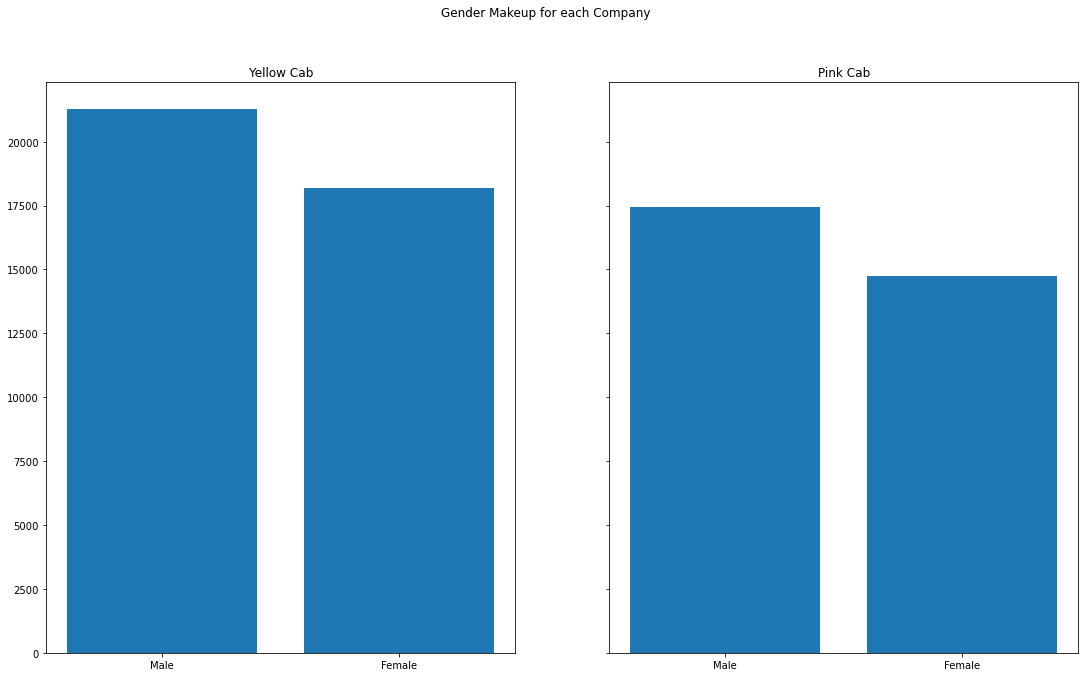

In [267]:
gen_fig, (y_gen, p_gen) = plt.subplots(1, 2, sharey = True)
gen_fig.suptitle('Gender Makeup for each Company')
labels = ['Male', 'Female']
p_gen.set_title('Pink Cab')
y_gen.set_title('Yellow Cab')
p_counts = [p_male, p_female]
y_counts = [y_male, y_female]
p_gen.bar(labels, p_counts)
y_gen.bar(labels, y_counts)
gen_fig.set_size_inches(18.5, 10.5)

In [225]:
y_diff = y_male - y_female 
p_diff = p_male - p_female 
y_diff, p_diff

(3069, 2694)

As we can see, the Yellow Cab company is slightly more diverse when it comes to gender, but both companies have good gender diversity. 

Next, we will look at age diversity for each company. Let's define the following age groups: 18-27, 28-37, 38-47, 48-57, 58+ 

In [250]:
# Gather Yellow Cab age groups 
y_group1827 = y_data.loc[((y_data['Age'] >= 18) & (y_data['Age'] <= 27))]
y_group2837 = y_data.loc[((y_data['Age'] >= 28) & (y_data['Age'] <= 37))]
y_group3847 = y_data.loc[((y_data['Age'] >= 38) & (y_data['Age'] <= 47))]
y_group4857 = y_data.loc[((y_data['Age'] >= 48) & (y_data['Age'] <= 57))]
y_group58 = y_data.loc[y_data['Age'] >= 58]
# Gather Pink Cab age groups 
p_group1827 = p_data.loc[((p_data['Age'] >= 18) & (p_data['Age'] <= 27))]
p_group2837 = p_data.loc[((p_data['Age'] >= 28) & (p_data['Age'] <= 37))]
p_group3847 = p_data.loc[((p_data['Age'] >= 38) & (p_data['Age'] <= 47))]
p_group4857 = p_data.loc[((p_data['Age'] >= 48) & (p_data['Age'] <= 57))]
p_group58 = p_data.loc[p_data['Age'] >= 58]

In [251]:
# We're going to define a function to get number of unique customers in each age group 
def find_unique_cust(series): 
    customers = len(series.Customer_ID.unique())
    return customers

In [254]:
# Gather unique numbers for Yellow Cab 
y_group1827_num = find_unique_cust(y_group1827)
y_group2837_num = find_unique_cust(y_group2837)
y_group3847_num = find_unique_cust(y_group3847)
y_group4857_num = find_unique_cust(y_group4857)
y_group58_num = find_unique_cust(y_group58)
# Gather unique numbers for Pink Cab 
p_group1827_num = find_unique_cust(p_group1827)
p_group2837_num = find_unique_cust(p_group2837)
p_group3847_num = find_unique_cust(p_group3847)
p_group4857_num = find_unique_cust(p_group4857)
p_group58_num = find_unique_cust(p_group58)

<BarContainer object of 5 artists>

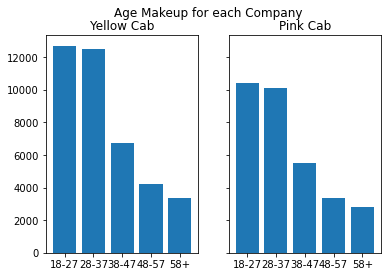

In [259]:
# Graph the results 
age_fig, (y_age, p_age) = plt.subplots(1,2, sharey = True)
age_fig.suptitle('Age Makeup for each Company')
labels = ['18-27', '28-37', '38-47', '48-57', '58+']
p_age.set_title('Pink Cab')
y_age.set_title('Yellow Cab')
p_counts = [p_group1827_num, p_group2837_num, p_group3847_num, p_group4857_num, p_group58_num]
y_counts = [y_group1827_num, y_group2837_num, y_group3847_num, y_group4857_num, y_group58_num]
p_age.bar(labels, p_counts)
y_age.bar(labels, y_counts)
age_fig.set_size_inches(18.5, 10.5)

Both companies have a majority of their clients coming from younger age groups, and the age makeup for each company is very similar. 

Next, let's look at monthly income diversity for both companies. We'll define the monthly income groups as: 2k - 7k, 8k - 13k, 14k - 19k, 20k - 25k, 26k+.

In [262]:
# Gather Yellow Cab income groups 
y_group27 = y_data.loc[((y_data['Monthly_Income'] >= 2000) & (y_data['Monthly_Income'] <= 7999))]
y_group813 = y_data.loc[((y_data['Monthly_Income'] >= 8000) & (y_data['Monthly_Income'] <= 13999))]
y_group1419 = y_data.loc[((y_data['Monthly_Income'] >= 14000) & (y_data['Monthly_Income'] <= 19999))]
y_group2025 = y_data.loc[((y_data['Monthly_Income'] >= 20000) & (y_data['Monthly_Income'] <= 25999))]
y_group26 = y_data.loc[y_data['Monthly_Income'] >= 26000]
# Gather Pink Cab income groups 
p_group27 = p_data.loc[((p_data['Monthly_Income'] >= 2000) & (p_data['Monthly_Income'] <= 7999))]
p_group813 = p_data.loc[((p_data['Monthly_Income'] >= 8000) & (p_data['Monthly_Income'] <= 13999))]
p_group1419 = p_data.loc[((p_data['Monthly_Income'] >= 14000) & (p_data['Monthly_Income'] <= 19999))]
p_group2025 = p_data.loc[((p_data['Monthly_Income'] >= 20000) & (p_data['Monthly_Income'] <= 25999))]
p_group26 = p_data.loc[p_data['Monthly_Income'] >= 26000]

In [263]:
# Gather unique numbers for Yellow Cab 
y_group27_num = find_unique_cust(y_group27)
y_group813_num = find_unique_cust(y_group813)
y_group1419_num = find_unique_cust(y_group1419)
y_group2025_num = find_unique_cust(y_group2025)
y_group26_num = find_unique_cust(y_group26)
# Gather unique numbers for Pink Cab 
p_group27_num = find_unique_cust(p_group27)
p_group813_num = find_unique_cust(p_group813)
p_group1419_num = find_unique_cust(p_group1419)
p_group2025_num = find_unique_cust(p_group2025)
p_group26_num = find_unique_cust(p_group26)

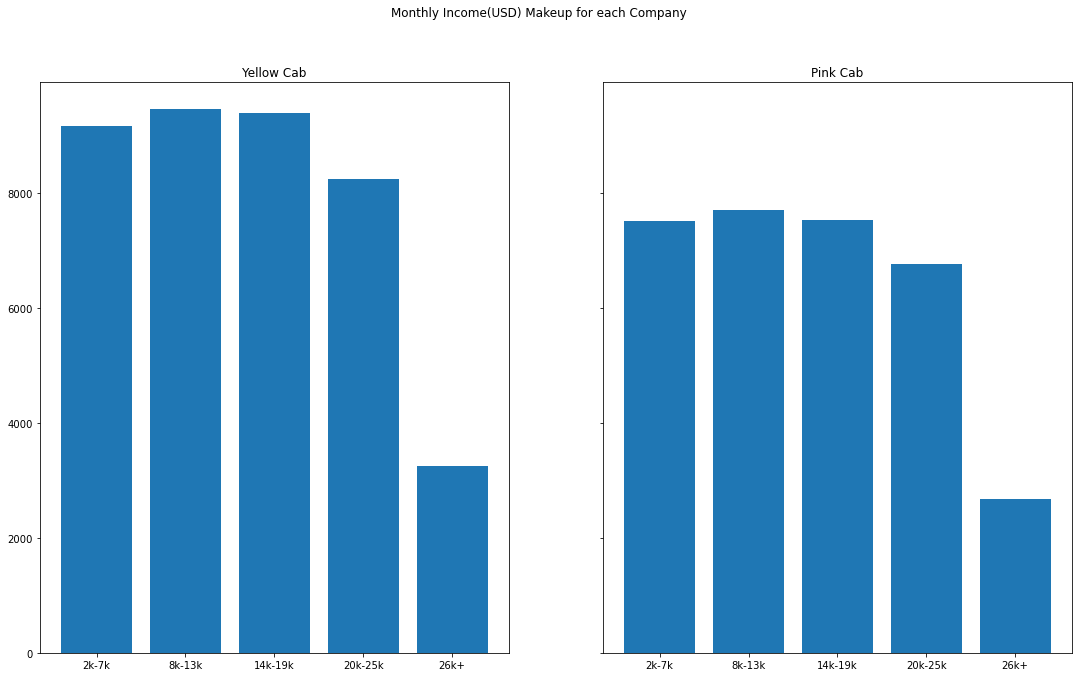

In [266]:
# Graph the results 
inc_fig, (y_inc, p_inc) = plt.subplots(1,2, sharey = True)
inc_fig.suptitle('Monthly Income(USD) Makeup for each Company')
labels = ['2k-7k', '8k-13k', '14k-19k', '20k-25k', '26k+']
p_inc.set_title('Pink Cab')
y_inc.set_title('Yellow Cab')
p_counts = [p_group27_num, p_group813_num, p_group1419_num, p_group2025_num, p_group26_num]
y_counts = [y_group27_num, y_group813_num, y_group1419_num, y_group2025_num, y_group26_num]
p_inc.bar(labels, p_counts)
y_inc.bar(labels, y_counts)
inc_fig.set_size_inches(18.5, 10.5)

Again, the two companies have very similar income diversity, with both leaning towards lower to middle-high classes. 

# Reccomendation
Now that we have performed the necessary analyses on both of the companies, it is time to provide our informed reccomendation on which company to invest in. Let's go over the different factors that influenced our decision. 

Consumer Traffic: 
As seen in our first hypothesis, the Yellow Cab Company receives significantly more consumer traffic throughour every month of the year. On top of this, they also have a significantly higher profit per trip. Because of this, the Yellow Cab Company receives a strong advantage in this area. 

Customer Satisfaction: 
It's safe to say that if a customer re-books with the same company within a week of their previous trip, they were satisfied with their ride. When looking at these "repeat customers" it's clear that the Yellow Cab Company has significantly more satisfied customers than the Pink Cab Company. 

Efficiency of Trips: 
In the cab industry, it's important that the company is receiving as much income per KM as possible. When looking at the graphs of Trip price / KM vs Customer Monthly income, we can see that each company brings in about the same range of income classes. However, if we look at the number of high revenue trips, we can see that the Yellow Cab Company has significantly more of them. 

"Big City" Prescense: 
Naturally, trips will be more expensive in bigger cities due to the amount of people. It's important to look at the client makeup and see what percent of the company's users reside in the bigger cities. If we look at the "Big City Score" that was calculated above, we can see the Yellow Cab Company does significantly better in this area, which is a good sign for future profit. 

Customer Diversity: 
In any industry, it's important to have a diverse clientele so that your revenue is coming from many different groups. When looking at the diversity of both companies, they appear to be about the same, so no comapany is given an advantage in this area. 

Taking all of this information in, it's clear that the Yellow Cab Company is the best company to invest in. They outperform the Pink Cab Company in almost every area, and it's safe to say they are the better choice in this scenario. 

* NOTE: graphs will be cleaned up before being pasted into PPT * 